  Consumo sustancias   Argentina 2022  - 


        Este data set tiene como origen el organismo del "Indec"  Argentina , donde acumula los datos de una encuesta
        sobre el consumo de sustancias/drogas  que pueden afectar la salud de los seres humanos: alcohol, medicamentos , marihuana, cocahina ,etc,etc..., dicha encuesta es realizada en el año 2022.
        En este analisis ,trataremos  de mostrar las posibles causas ,herramientas de tratamiento y posibles soluciones a estos cosnumos .  

In [1]:
texto="""Este data set tiene como origen el organismo del "Indec"  Argentina , donde acumula los datos de una encuesta
        sobre el consumo de sustancias/drogas  que pueden afectar la salud de los seres humanos: alcohol, medicamentos , marihuana, cocahina ,etc,etc..., dicha encuesta es realizada en el año 2022.
        En este analisis ,trataremos  de mostrar las posibles causas ,herramientas de tratamiento y posibles soluciones a estos cosnumos .  """
cantidad_de_caracteres = len(texto)
print("Cantidad de caracteres:", cantidad_de_caracteres)

Cantidad de caracteres: 448


In [1]:
import pandas as pd
import numpy as np
url = 'https://drive.google.com/uc?id=1MwJRQi1BC82ZMu50HL1Q9_rDRZxP6N3D'

df = pd.read_csv(url,sep=';', on_bad_lines='skip')
# Rellenar valores nulos 
df = df.fillna(0)  # Rellenar con 0
# Ver las primeras filas del DataFrame
print(df.head())

# Obtener el número de filas y columnas
num_filas, num_columnas = df.shape

print(f"El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")

C:\Users\danie\AppData\Local\Temp\ipykernel_20780\4160376258.py:5: DtypeWarning: Columns (175,176,206,207,276,381,382,383,396,397,424) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url,sep=';', on_bad_lines='skip')


   ID_PER   WPER  CANT_MIEMBROS_HOGAR  CANT_PERSONAS0A17  CLIMA_EDUCATIVO  \
0  336578    124                    1                  0                2   
1  305909    781                    1                  0                3   
2  358892  34193                    4                  1                2   
3  342664    968                    1                  0                3   
4  394688  11509                    2                  0                3   

   J_SEXO  J_EDAD  J_NIVEL_EDUCATIVO  SEXO_SEL  EDAD_SEL  ...  ID_06B  ID_06C  \
0       1      27                  4         1        27  ...       4       2   
1       1      33                  6         1        33  ...       2       2   
2       1      43                  4         2        19  ...       1       2   
3       2      51                  6         2        51  ...       1       4   
4       2      59                  5         1        31  ...       2       1   

   ID_06D  ID_06E  ID_06F  ID_06G  ID_06H  ID_06I 

Algunas  de  las variables que utilizaremos para este desafio seran :
    'AL_01': 'Bebidas alcohólicas',
    'SA_08': 'Medicamentos para síntomas leves',
    'TA_01': 'Tabaco',
    'TR_01': 'Tranquilizantes recetados',
    'ES_01': 'Estimulantes recetados',
    'MO_01': 'Medicamentos opioides sin receta',
    'MA_04': 'Marihuana en los últimos 12 meses',
    'CO_01': 'Cocaína',
    'J_EDAD': 'EDAD DEL JEFE O JEFA DE HOGAR,
    'EDAD_SEL':'EDAD DEL ENCUESTADO',
    'SEXO_SEL': 'sexo'

In [87]:
# Lista de columnas de interés
columnas = [
    'AL_01',  # Bebidas alcohólicas
    'SA_08',  # Medicamentos para síntomas leves
    'TA_01',  # Tabaco
    'TR_01',  # Tranquilizantes recetados
    'ES_01',  # Estimulantes recetados
    'MO_01',  # Medicamentos opioides sin receta
    'MA_04',  # Marihuana en los últimos 12 meses
    'CO_01',  # Cocaína
    'J_EDAD', # EDAD DEL JEFE O JEFA DE HOGAR
    'EDAD_SEL', # EDAD DEL ENCUESTADO
    'SEXO_SEL'  # Sexo
]

# Seleccionar las columnas en el DataFrame
df_seleccionado = df[columnas]

# Mostrar las primeras filas del DataFrame seleccionado
print(df_seleccionado.head())


   AL_01  SA_08  TA_01  TR_01  ES_01  MO_01  MA_04  CO_01  J_EDAD  EDAD_SEL  \
0      1      3      1      2      2      4    1.0      2      27        27   
1      1      3      1      2      2      4    1.0      2      33        33   
2      1      3      1      2      2     98    0.0      2      43        19   
3      1      4      1      2      2      4    0.0      2      51        51   
4      1      1      1      2      2      4    1.0      2      59        31   

   SEXO_SEL  
0         1  
1         1  
2         2  
3         2  
4         1  


In [88]:
df_seleccionado.describe()

,AL_01,SA_08,TA_01,TR_01,ES_01,MO_01,MA_04,CO_01,J_EDAD,EDAD_SEL,SEXO_SEL
count,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000
mean,1.204029,2.754187,1.515918,2.020146,2.123528,4.737274,0.270270,2.037473,50.507793,43.478030,1.547339
std,1.820729,4.072860,1.351328,4.065810,3.952772,8.417326,1.090352,2.656042,15.463877,16.498695,0.497775
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,16.000000,16.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,0.000000,2.000000,39.000000,30.000000,1.000000
50%,1.000000,3.000000,1.000000,2.000000,2.000000,4.000000,0.000000,2.000000,50.000000,42.000000,2.000000
75%,1.000000,3.000000,2.000000,2.000000,2.000000,4.000000,0.000000,2.000000,63.000000,57.000000,2.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,75.000000,2.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12062 entries, 0 to 12061
Columns: 564 entries, ID_PER to rango_edad_str
dtypes: category(1), float64(406), int64(136), object(21)
memory usage: 51.8+ MB


Preguntas e Hipotesys :



Preguntas de interés:

¿Cuál es la sustancia más consumida según la encuesta y cómo varía por edad y género?
¿Existe una correlación entre el nivel socioeconómico y la prevalencia del consumo de ciertas drogas?
¿Cómo ha evolucionado el consumo de estas sustancias en comparación con años anteriores?
¿Qué factores demográficos (como la ubicación, la edad o el género) están asociados con un mayor riesgo de consumo de sustancias?
¿Cuáles son las tendencias en el consumo de nuevas sustancias psicoactivas que han emergido recientemente?



¿Cuál es la sustancia más consumida según la encuesta y cómo varía por edad y género?

In [4]:


# Diccionario que mapea las columnas a las sustancias correspondientes
consumo_sustancias = {
    'AL_01': 'Bebidas alcohólicas',
    'SA_08': 'Medicamentos para síntomas leves',
    'TA_01': 'Tabaco',
    'TR_01': 'Tranquilizantes recetados',
    'ES_01': 'Estimulantes recetados',
    'MO_01': 'Medicamentos opioides sin receta',
    'MA_04': 'Marihuana en los últimos 12 meses',
    'CO_01': 'Cocaína'
}

# Contar las respuestas afirmativas (valor 1) para cada sustancia
frecuencias_consumo = {}
for columna, sustancia in consumo_sustancias.items():
    # Contamos cuántas veces se responde "Sí" (que corresponde al valor 1)
    frecuencia = df[columna].value_counts().get(1, 0)
    frecuencias_consumo[sustancia] = frecuencia

# Encontrar la sustancia con la frecuencia más alta de consumo afirmativo
sustancia_mas_consumida = max(frecuencias_consumo, key=frecuencias_consumo.get)
frecuencia_mas_alta = frecuencias_consumo[sustancia_mas_consumida]

# Imprimir los resultados
print("La sustancia más consumida es:", sustancia_mas_consumida)
print("Frecuencia de consumo afirmativo:", frecuencia_mas_alta)
print("Frecuencias de consumo para todas las sustancias:", frecuencias_consumo)


La sustancia más consumida es: Bebidas alcohólicas
Frecuencia de consumo afirmativo: 9989
Frecuencias de consumo para todas las sustancias: {'Bebidas alcohólicas': 9989, 'Medicamentos para síntomas leves': 3342, 'Tabaco': 6033, 'Tranquilizantes recetados': 1794, 'Estimulantes recetados': 450, 'Medicamentos opioides sin receta': 20, 'Marihuana en los últimos 12 meses': 903, 'Cocaína': 421}


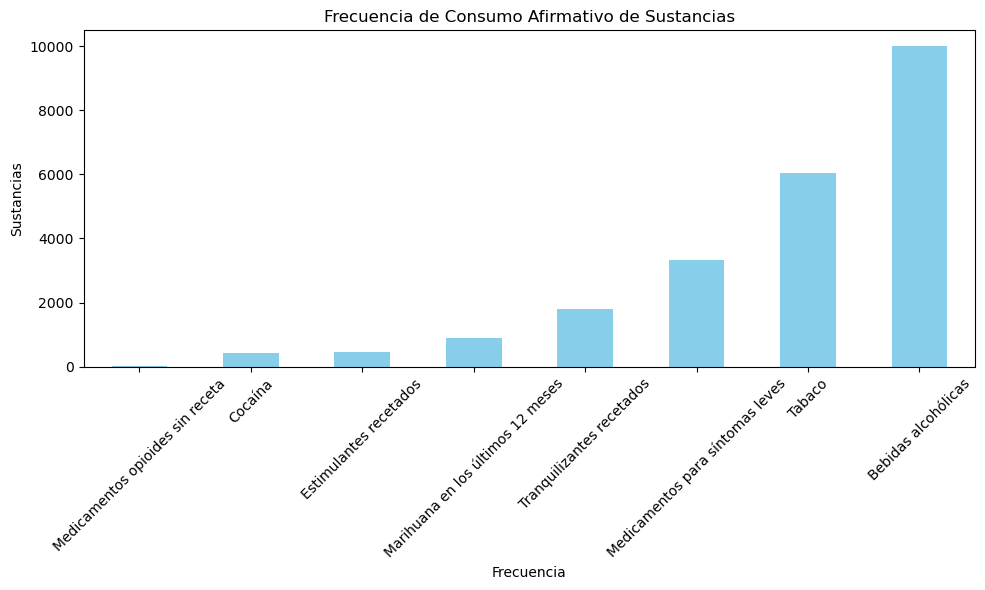

In [5]:
import matplotlib.pyplot as plt
# Convertir a Series de Pandas para facilitar la visualización
frecuencias_series = pd.Series(frecuencias_consumo)

# Crear y mostrar el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias_series.sort_values().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Consumo Afirmativo de Sustancias')
plt.xlabel('Frecuencia')
plt.ylabel('Sustancias')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

Hipótesis Nula (H0): No existe diferencia significativa en las tasas de consumo de sustancias entre diferentes grupos demográficos (como edad, género, ubicación geográfica, nivel socioeconómico, etc.) en Argentina según los datos recopilados en 2022.

como se puede expresar H0 , como H0:    "H0:μ_edad=μ_general"

"no hay diferencia de consumo de sustancias entre una edad en particular y la del grupo de la poblacion total"


Hipótesis Alternativa (H1): Existen diferencias significativas en las tasas de consumo de sustancias entre diferentes grupos demográficos en Argentina, y estas diferencias se pueden asociar con variables como la edad, el género, la ubicación geográfica, el nivel socioeconómico, entre otros, según los datos recopilados en 2022.

Podemos platear 3 tipos de H1 :

1- H1_@ : μ_edad != μ_general (test bivariado)

2- H1_@ : μ_edad > μ_general (test univariado)

3- H1_@ : μ_edad < μ_general (test univariado)




1 - Prueba de hipotesys  bivariada  H1_@ : μ_edad != μ_general  mi alfa= 5%

In [10]:
%conda install scipy -y

^C


  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/43/d0/f3cd75b62e1b90f48dbf091261b2fc7ceec14a700e308c50f6a69c83d337/scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 217.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 262.6 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 290.5 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 291.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.1 MB 960.0 kB/s eta 0:00:46
   ---------------------------------------- 0.2/44.1 MB 2.1 MB/s eta 0:00:21
   ---------------------------------------- 0.3/44.1 MB 2.4 MB/s eta 0:00:19
    -----------------------

In [6]:

import scipy.stats as stats



# Supongamos que 'AL_01' es la columna que representa el consumo de alcohol
# y está codificada como 1 para "Sí" y 0 para "No"
datos_muestra = df['AL_01']
media_hipotetica = 0.05 # Define aquí tu media poblacional hipotética

# Calcular la media y la desviación estándar de la muestra
media_muestra = np.mean(datos_muestra)
std_muestra = np.std(datos_muestra, ddof=1)
n = len(datos_muestra)

# Calcular el estadístico t
t_statistic = (media_muestra - media_hipotetica) / (std_muestra / np.sqrt(n))

# Calcular el valor p
p_value = stats.t.sf(np.abs(t_statistic), df=n-1) * 2  # *2 para la prueba de dos colas

# Imprimir los resultados
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 69.61150968513898
P-value: 0.0


visualizacion  hipot 1 (visalizacion bivariada)

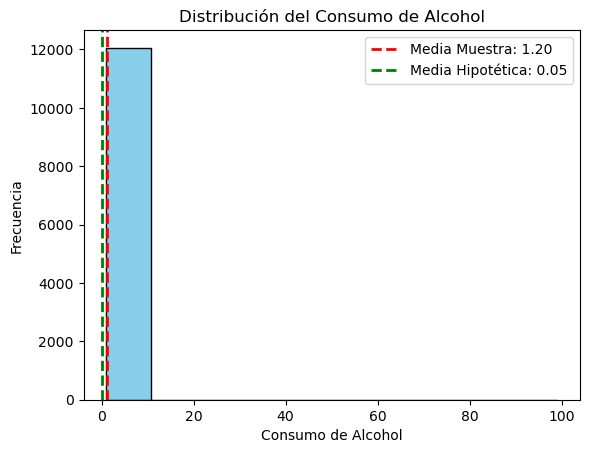

In [7]:
# Generar el histograma de la distribución del consumo de alcohol
plt.hist(datos_muestra, bins=10, color='skyblue', edgecolor='black')

# Añadir una línea para la media de la muestra
plt.axvline(media_muestra, color='red', linestyle='dashed', linewidth=2, label=f'Media Muestra: {media_muestra:.2f}')

# Añadir una línea para la media hipotética
plt.axvline(media_hipotetica, color='green', linestyle='dashed', linewidth=2, label=f'Media Hipotética: {media_hipotetica}')

# Añadir título y etiquetas
plt.title('Distribución del Consumo de Alcohol')
plt.xlabel('Consumo de Alcohol')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

Visualizacion  univariada  

count    12062.000000
mean         1.204029
std          1.820729
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         99.000000
Name: AL_01, dtype: float64
Media de consumo de alcohol: 1.20402918255679
Mediana de consumo de alcohol: 1.0
Modo de consumo de alcohol: 1
Rango de consumo de alcohol: 98
Varianza de consumo de alcohol: 3.3150554831048598
Desviación estándar de consumo de alcohol: 1.8207293821721173


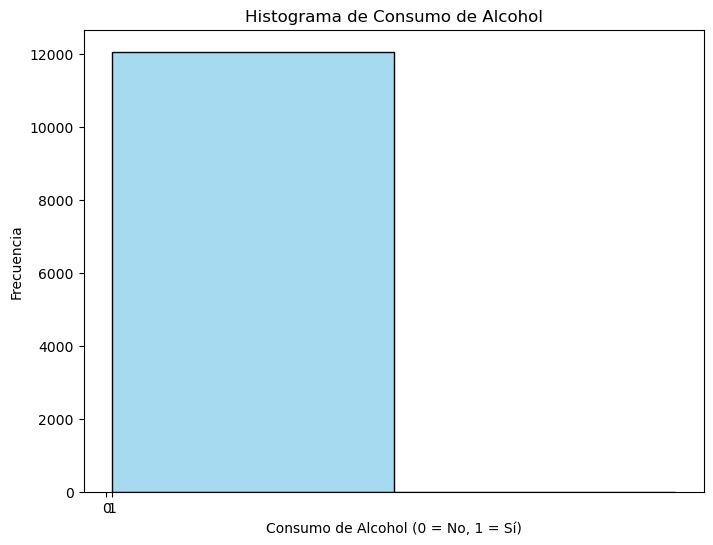

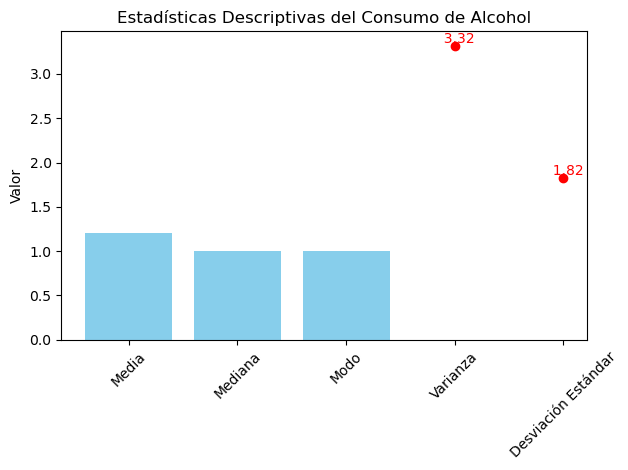

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'df' es tu DataFrame y 'AL_01' es la columna que representa el consumo de alcohol
# y está codificada como 1 para "Sí" y 0 para "No"

# Estadísticas Descriptivas
consumo_alcohol_descripcion = df['AL_01'].describe()
print(consumo_alcohol_descripcion)

# Media
media_consumo_alcohol = df['AL_01'].mean()
print("Media de consumo de alcohol:", media_consumo_alcohol)

# Mediana
mediana_consumo_alcohol = df['AL_01'].median()
print("Mediana de consumo de alcohol:", mediana_consumo_alcohol)

# Modo
modo_consumo_alcohol = df['AL_01'].mode()[0]
print("Modo de consumo de alcohol:", modo_consumo_alcohol)

# Rango
rango_consumo_alcohol = df['AL_01'].max() - df['AL_01'].min()
print("Rango de consumo de alcohol:", rango_consumo_alcohol)

# Varianza
varianza_consumo_alcohol = df['AL_01'].var()
print("Varianza de consumo de alcohol:", varianza_consumo_alcohol)

# Desviación Estándar
std_consumo_alcohol = df['AL_01'].std()
print("Desviación estándar de consumo de alcohol:", std_consumo_alcohol)

# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(df['AL_01'], kde=False, color='skyblue', bins=2)
plt.title('Histograma de Consumo de Alcohol')
plt.xlabel('Consumo de Alcohol (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.xticks([0, 1])
plt.show()

# Estas serían tus estadísticas calculadas previamente
estadisticas = {
    'Media': 1.20402918255679,
    'Mediana': 1.0,
    'Modo': 1,
    'Varianza': 3.3150554831048598,
    'Desviación Estándar': 1.8207293821721173
}

# Para el modo, usamos un gráfico de barras
plt.bar(['Media', 'Mediana', 'Modo'], [estadisticas['Media'], estadisticas['Mediana'], estadisticas['Modo']], color='skyblue')

# Añadir la varianza y la desviación estándar como puntos
plt.scatter(['Varianza', 'Desviación Estándar'], [estadisticas['Varianza'], estadisticas['Desviación Estándar']], color='red')

# Añadir anotaciones para varianza y desviación estándar
plt.text('Varianza', estadisticas['Varianza'], f"  {estadisticas['Varianza']:.2f}", va='bottom', ha='center', color='red')
plt.text('Desviación Estándar', estadisticas['Desviación Estándar'], f"  {estadisticas['Desviación Estándar']:.2f}", va='bottom', ha='center', color='red')

plt.title('Estadísticas Descriptivas del Consumo de Alcohol')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2- H1_@ : μ_edad > μ_general (test univariado)

Media de consumo para la edad 45: 1.5733333333333333
Media de consumo general: 1.20402918255679
T-statistic: 0.8479044012266682
P-value (one-tailed): 0.1986981555073875
No rechazamos la hipótesis nula, no hay suficiente evidencia de que la media de consumo de alcohol a la edad de 45 sea mayor que la media general.


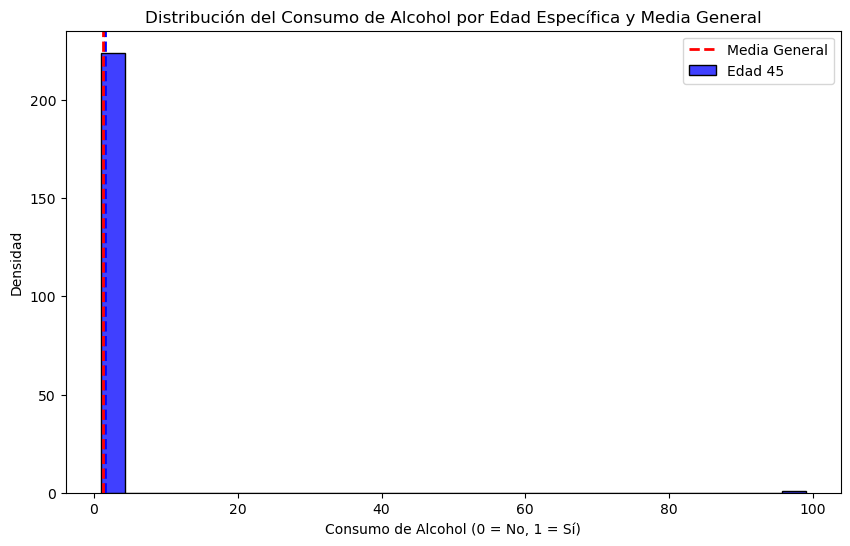

In [15]:

# Supongamos que tienes las siguientes columnas en tu DataFrame df:
# 'edad' que representa la edad de los individuos
# 'AL_01' que representa el consumo de alcohol (codificado como 1 para "Sí" y 0 para "No")

# Definir la edad específica que quieres analizar
edad_especifica = 45  # por ejemplo

# Filtrar los datos para la edad específica
datos_edad_especifica = df[df['EDAD_SEL'] == edad_especifica]['AL_01']

# Calcular la media de consumo de alcohol para la edad específica
media_consumo_edad_especifica = np.mean(datos_edad_especifica)

# Calcular la media general de consumo de alcohol
media_consumo_general = df['AL_01'].mean()

# Realizar la prueba t de una muestra
t_statistic, p_value = stats.ttest_1samp(datos_edad_especifica, media_consumo_general)

# Como estás interesado en una dirección específica (mayor que), usa una prueba de una cola
p_value_one_tailed = p_value / 2 if t_statistic > 0 else 1 - p_value / 2

# Imprimir los resultados
print(f"Media de consumo para la edad {edad_especifica}:", media_consumo_edad_especifica)
print("Media de consumo general:", media_consumo_general)
print("T-statistic:", t_statistic)
print("P-value (one-tailed):", p_value_one_tailed)

# Decidir si rechazar la hipótesis nula
alpha = 0.05  # Nivel de significancia típico
if p_value_one_tailed < alpha and t_statistic > 0:
    print(f"Rechazamos la hipótesis nula, hay evidencia de que la media de consumo de alcohol a la edad de {edad_especifica} es mayor que la media general.")
else:
    print(f"No rechazamos la hipótesis nula, no hay suficiente evidencia de que la media de consumo de alcohol a la edad de {edad_especifica} sea mayor que la media general.")

# Visualización: Histograma de la distribución de consumo para la edad específica vs la media general
plt.figure(figsize=(10, 6))

# Histograma para la edad específica
sns.histplot(datos_edad_especifica, bins=30, kde=False, color='blue', label=f'Edad {edad_especifica}')

# Línea para la media de consumo de alcohol para la edad específica
plt.axvline(media_consumo_edad_especifica, color='blue', linestyle='dashed', linewidth=2)

# Línea para la media general de consumo de alcohol
plt.axvline(media_consumo_general, color='red', linestyle='dashed', linewidth=2, label='Media General')

plt.legend()

plt.title('Distribución del Consumo de Alcohol por Edad Específica y Media General')
plt.xlabel('Consumo de Alcohol (0 = No, 1 = Sí)')
plt.ylabel('Densidad')
plt.show()

Hipotesys  con varias variables (visualizacion multivariados)

- HO :  el consumo de sustancias es igual en hombres que en mujeres :  

      H0_@ : μ_muj = μ_hombres 

      H1_@ : μ_mujeres <  μ_hombres

In [36]:
import numpy as np
from scipy import stats

# Supongamos que df es tu DataFrame y tiene una columna 'genero' y 'consumo_sustancias'
# Filtrar los datos para hombres y mujeres
media_consumo_por_sexo = df.groupby('SEXO_SEL')['AL_01'].mean()
media_hombres = media_consumo_por_sexo[1]  # Asumiendo que 'Varón' es el valor en 'SEXO_SEL' para hombres
media_mujeres = media_consumo_por_sexo[2]  # Asumiendo que 'Mujer' es el valor en 'SEXO_SEL' para mujeres

print("Media de consumo de alcohol para hombres:", media_hombres)
print("Media de consumo de alcohol para mujeres:", media_mujeres)


# Separa los datos por género
datos_hombres = df[df['SEXO_SEL'] == 1]['AL_01']
datos_mujeres = df[df['SEXO_SEL'] == 2]['AL_01']

# Realiza la prueba t de muestras independientes
t_statistic, p_value = stats.ttest_ind(datos_hombres, datos_mujeres)



# Imprimir los resultados
print("Media de consumo para hombres:", media_hombres)
print("Media de consumo para mujeres:", media_mujeres)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Decidir si rechazar la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula, hay una diferencia significativa en el consumo de sustancias entre hombres y mujeres.")
else:
    print("No rechazamos la hipótesis nula, no hay una diferencia significativa en el consumo de sustancias entre hombres y mujeres.")
#

Media de consumo de alcohol para hombres: 1.1042124542124543
Media de consumo de alcohol para mujeres: 1.286579824295668
Media de consumo para hombres: 1.1042124542124543
Media de consumo para mujeres: 1.286579824295668
T-statistic: -5.482120900164477
P-value: 4.2871256422680885e-08
Rechazamos la hipótesis nula, hay una diferencia significativa en el consumo de sustancias entre hombres y mujeres.


Para la hipotesys H1   H1_@ : μ_mujeres <  μ_hombres

In [39]:
import pandas as pd
from scipy import stats

# Supongamos que df es tu DataFrame y tiene una columna 'SEXO_SEL' y 'AL_01'
# Separa los datos por género
datos_hombres = df[df['SEXO_SEL'] == 1]['AL_01']
datos_mujeres = df[df['SEXO_SEL'] == 2]['AL_01']

# Realiza la prueba t de muestras independientes
t_statistic, p_value = stats.ttest_ind(datos_hombres, datos_mujeres,equal_var=False)

# Imprime los resultados
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Decisión basada en el valor p
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en el consumo entre hombres y mujeres.")
else:
    print("No rechazamos la hipótesis nula: No existe una diferencia significativa en el consumo entre hombres y mujeres.")


T-statistic: -6.0105544841251985
P-value: 1.9438187353275233e-09
Rechazamos la hipótesis nula: Existe una diferencia significativa en el consumo entre hombres y mujeres.


Visualizaciones 

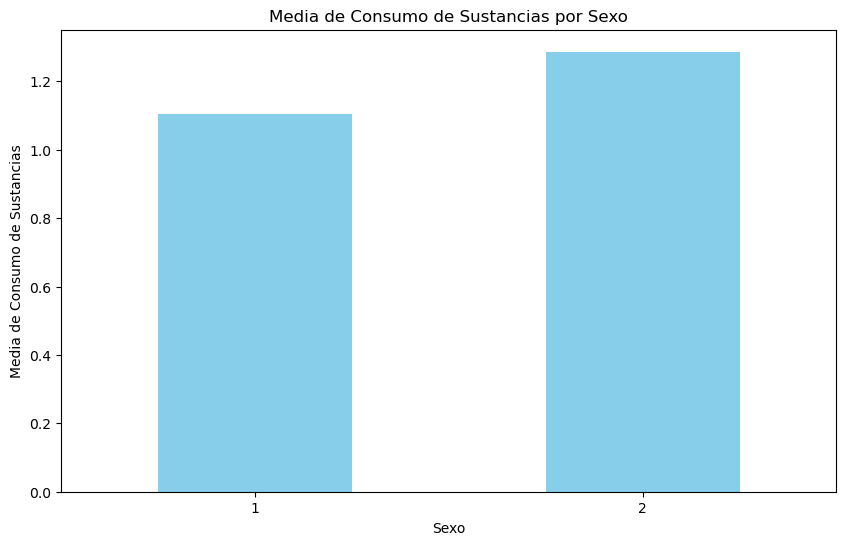

In [70]:
# Suponiendo que df es tu DataFrame y tiene las columnas 'SEXO_SEL' y 'AL_01'




# Calcula las medias nuevamente
media_consumo_por_sexo = df.groupby('SEXO_SEL')['AL_01'].mean()

plt.figure(figsize=(10, 6))
media_consumo_por_sexo.plot(kind='bar', color='skyblue')
plt.title('Media de Consumo de Sustancias por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Media de Consumo de Sustancias')
plt.xticks(rotation=0)
plt.show()


Calculando medidas de estdisticas descriptivas 

consumo por edad 

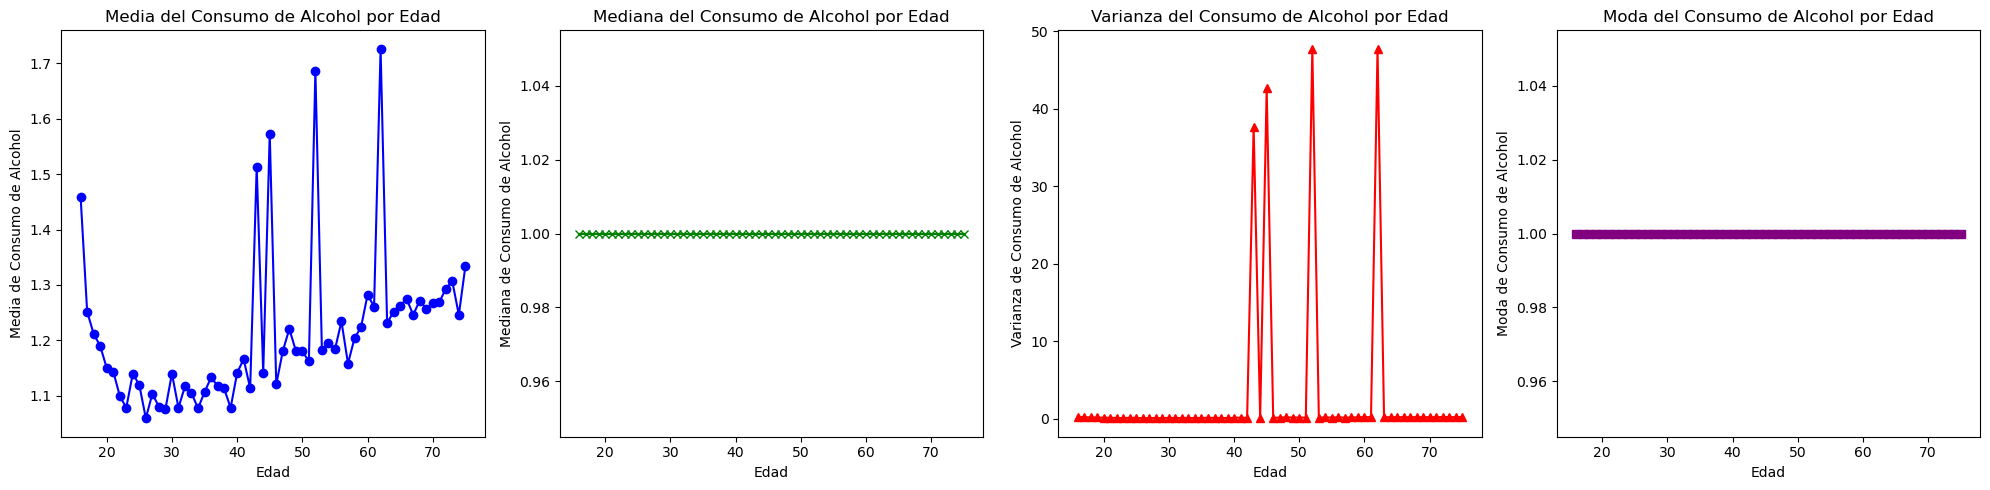

In [46]:
# Agrupar por edad y calcular estadísticas descriptivas, incluyendo la moda
estadisticas_por_edad = df.groupby('EDAD_SEL')['AL_01'].agg(['mean', 'median', 'var', lambda x: x.mode()[0]])
estadisticas_por_edad.columns = ['Media', 'Mediana', 'Varianza', 'Moda']
estadisticas_por_edad.reset_index(inplace=True)  # Resetear el índice para facilitar el gráfico

# Configurar el tamaño de la figura para los subgráficos
plt.figure(figsize=(20, 5))

# Gráfico para la Media
plt.subplot(1, 4, 1)
plt.plot(estadisticas_por_edad['EDAD_SEL'], estadisticas_por_edad['Media'], label='Media', color='blue', marker='o')
plt.title('Media del Consumo de Alcohol por Edad')
plt.xlabel('Edad')
plt.ylabel('Media de Consumo de Alcohol')

# Gráfico para la Mediana
plt.subplot(1, 4, 2)
plt.plot(estadisticas_por_edad['EDAD_SEL'], estadisticas_por_edad['Mediana'], label='Mediana', color='green', marker='x')
plt.title('Mediana del Consumo de Alcohol por Edad')
plt.xlabel('Edad')
plt.ylabel('Mediana de Consumo de Alcohol')

# Gráfico para la Varianza
plt.subplot(1, 4, 3)
plt.plot(estadisticas_por_edad['EDAD_SEL'], estadisticas_por_edad['Varianza'], label='Varianza', color='red', marker='^')
plt.title('Varianza del Consumo de Alcohol por Edad')
plt.xlabel('Edad')
plt.ylabel('Varianza de Consumo de Alcohol')

# Gráfico para la Moda
plt.subplot(1, 4, 4)
plt.plot(estadisticas_por_edad['EDAD_SEL'], estadisticas_por_edad['Moda'], label='Moda', color='purple', marker='s')
plt.title('Moda del Consumo de Alcohol por Edad')
plt.xlabel('Edad')
plt.ylabel('Moda de Consumo de Alcohol')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


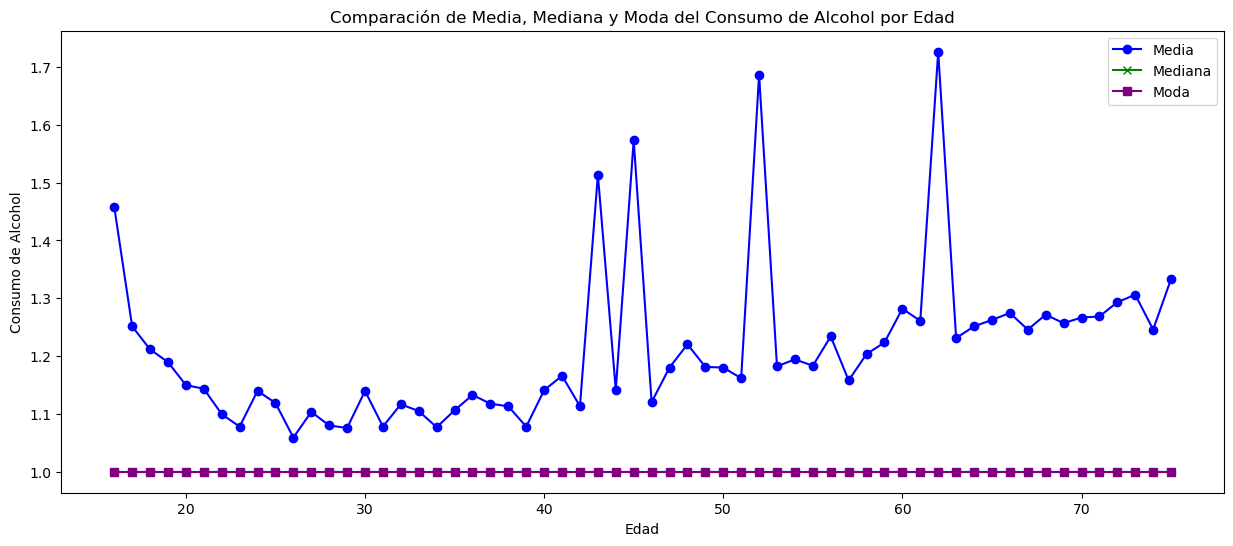

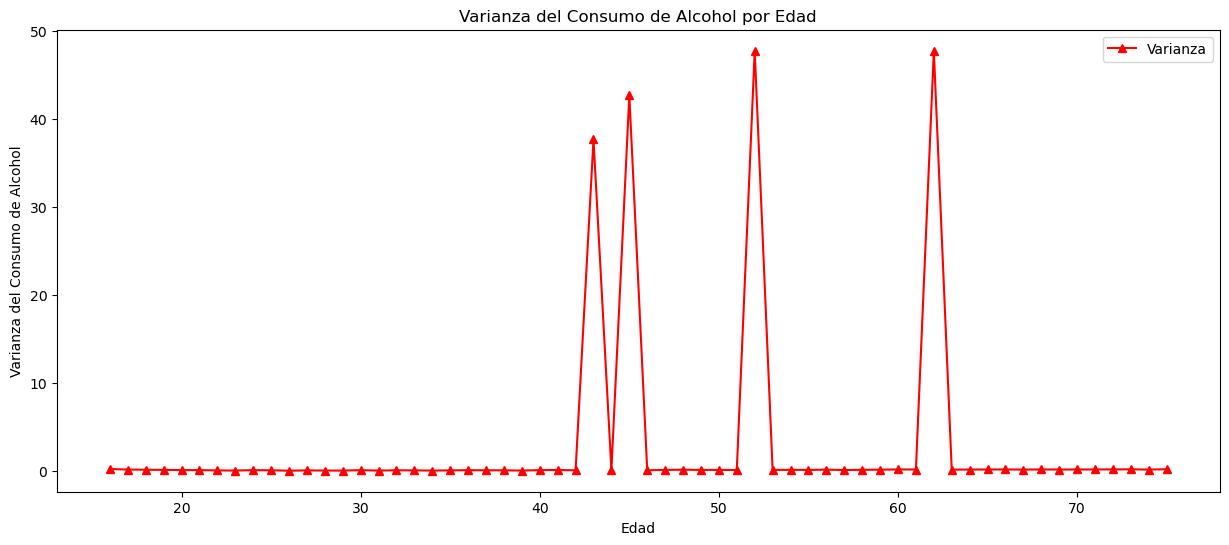

In [48]:


# Configurar el tamaño de la figura
plt.figure(figsize=(15, 6))

# Gráfico de líneas múltiples para la Media, Mediana y Moda
plt.plot(estadisticas_por_edad['EDAD_SEL'], estadisticas_por_edad['Media'], label='Media', color='blue', marker='o')
plt.plot(estadisticas_por_edad['EDAD_SEL'], estadisticas_por_edad['Mediana'], label='Mediana', color='green', marker='x')
plt.plot(estadisticas_por_edad['EDAD_SEL'], estadisticas_por_edad['Moda'], label='Moda', color='purple', marker='s')

plt.title('Comparación de Media, Mediana y Moda del Consumo de Alcohol por Edad')
plt.xlabel('Edad')
plt.ylabel('Consumo de Alcohol')
plt.legend()

# Mostrar el gráfico
plt.show()

# Gráfico separado para la Varianza debido a la diferencia en escala
plt.figure(figsize=(15, 6))
plt.plot(estadisticas_por_edad['EDAD_SEL'], estadisticas_por_edad['Varianza'], label='Varianza', color='red', marker='^')
plt.title('Varianza del Consumo de Alcohol por Edad')
plt.xlabel('Edad')
plt.ylabel('Varianza del Consumo de Alcohol')
plt.legend()

# Mostrar el gráfico
plt.show()


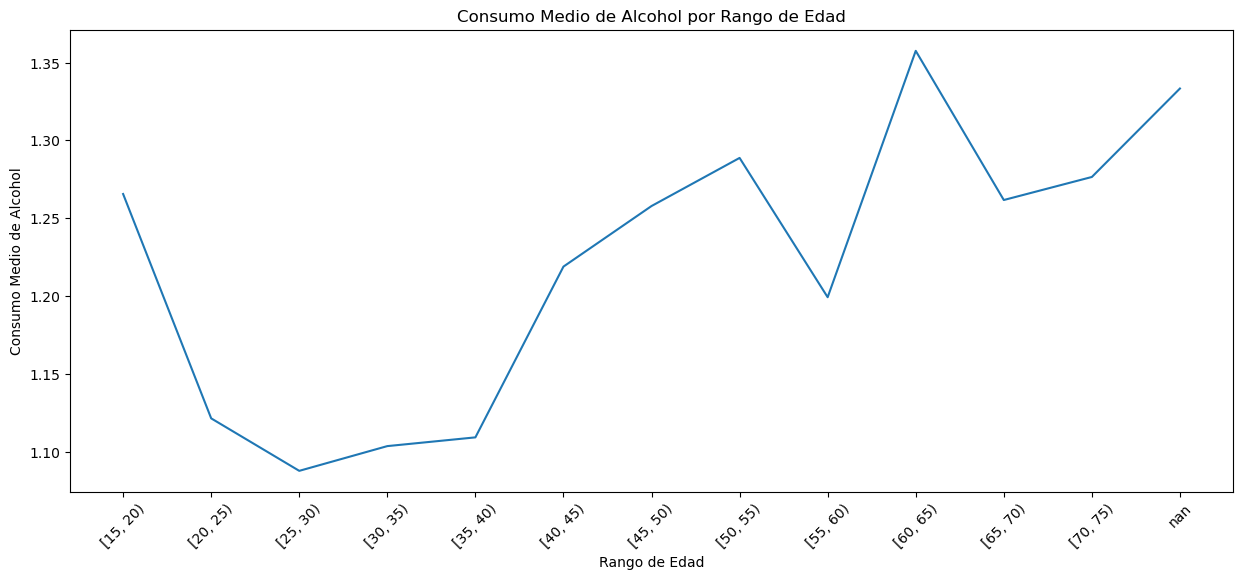

In [52]:
# Asumiendo que df es tu DataFrame y tiene las columnas 'edad' y 'AL_01'

# Definir los rangos de edad y crear la columna 'rango_edad'
bins = list(range(0, df['EDAD_SEL'].max() + 5, 5))
df['rango_edad'] = pd.cut(df['EDAD_SEL'], bins=bins, right=False)

# Convertir los rangos de edad a tipo string para facilitar la visualización
df['rango_edad_str'] = df['rango_edad'].astype(str)

# Calcular la media de consumo de alcohol por rango de edad
media_consumo_por_rango = df.groupby('rango_edad_str')['AL_01'].mean().reset_index()

# Crear un gráfico de líneas
plt.figure(figsize=(15, 6))
sns.lineplot(data=media_consumo_por_rango, x='rango_edad_str', y='AL_01')
plt.title('Consumo Medio de Alcohol por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Consumo Medio de Alcohol')
plt.xticks(rotation=45)
plt.show()

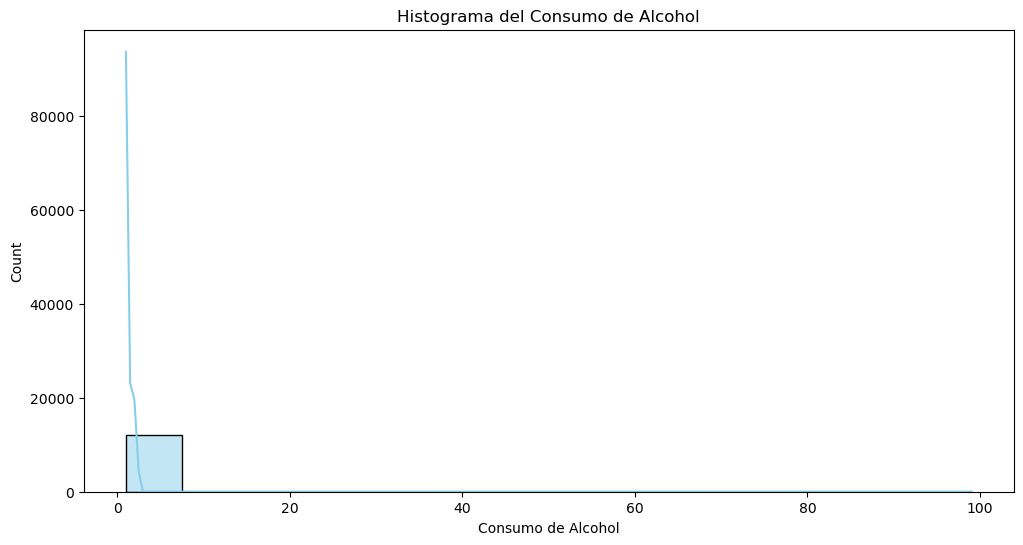

In [53]:
plt.figure(figsize=(12, 6))

# Histograma con KDE (Estimación de Densidad Kernel)
sns.histplot(df['AL_01'], kde=True, color='skyblue')
plt.title('Histograma del Consumo de Alcohol')
plt.xlabel('Consumo de Alcohol')
plt.show()

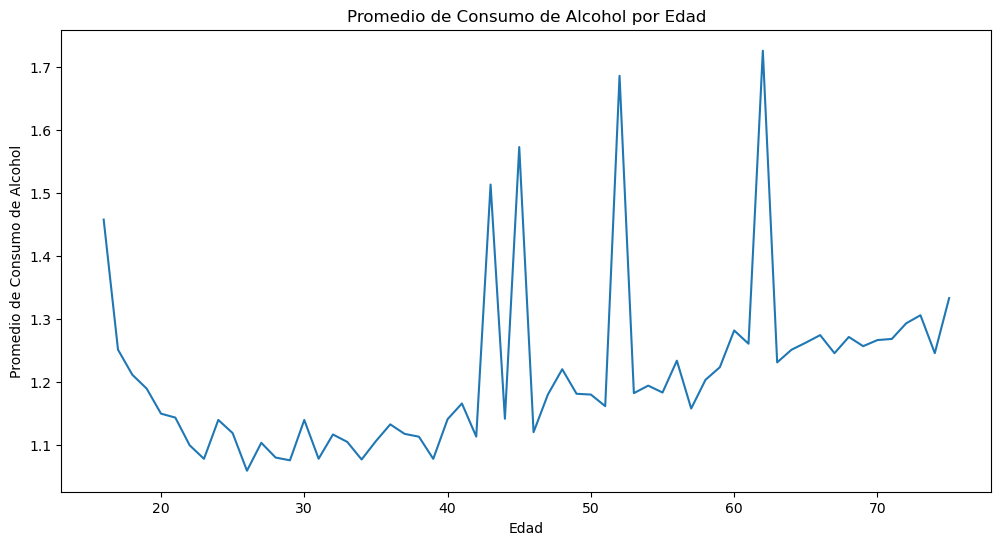

In [54]:
# Agrupar los datos por edad y calcular el promedio de consumo de alcohol
media_consumo_por_edad = df.groupby('EDAD_SEL')['AL_01'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=media_consumo_por_edad, x='EDAD_SEL', y='AL_01')
plt.title('Promedio de Consumo de Alcohol por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Consumo de Alcohol')
plt.show()

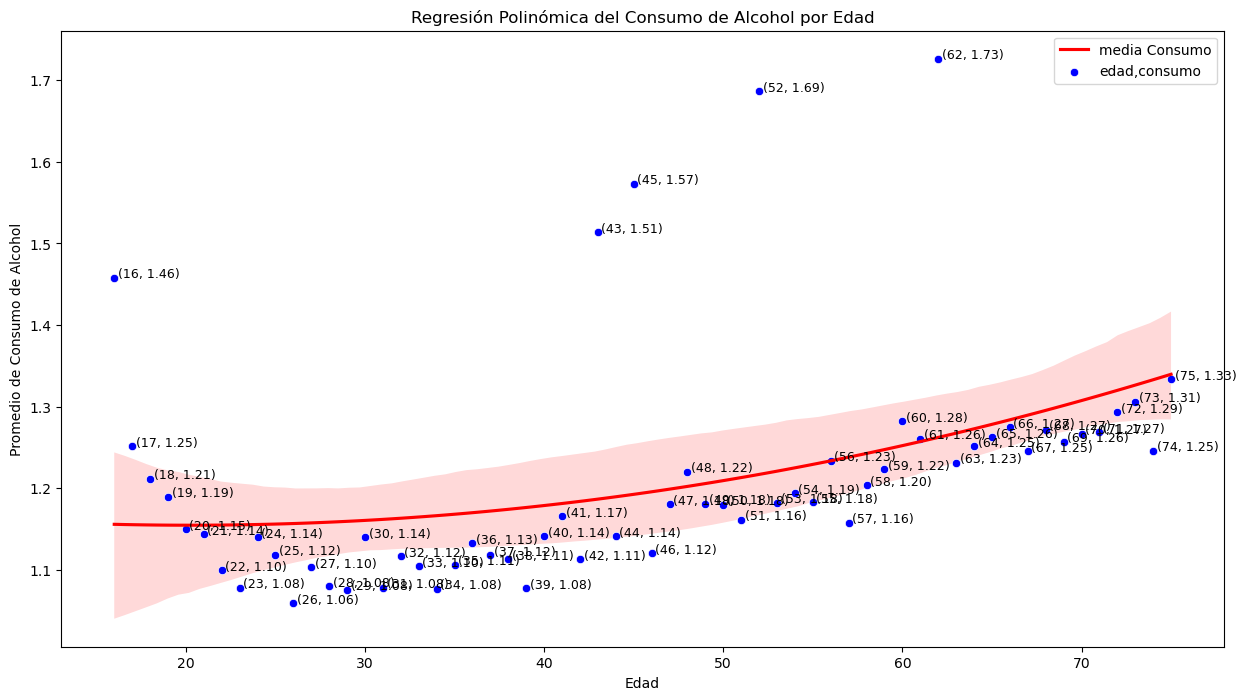

In [69]:

# Calcular el promedio de consumo de alcohol por edad
media_consumo_por_edad = df.groupby('EDAD_SEL')['AL_01'].mean().reset_index()

# Crear un gráfico de regresión polinómica
plt.figure(figsize=(15, 8))
# Ajuste polinómico de segundo orden
regplot = sns.regplot(x='EDAD_SEL', y='AL_01', data=media_consumo_por_edad, order=2, scatter=False, color='red', label='media Consumo')

# Gráfico de dispersión para los puntos individuales
scatter = sns.scatterplot(x='EDAD_SEL', y='AL_01', data=media_consumo_por_edad, color='blue', label='edad,consumo')

# Añadir anotaciones para cada punto
for i in range(media_consumo_por_edad.shape[0]):
    plt.text(media_consumo_por_edad.loc[i, 'EDAD_SEL'] + 0.2,  # X + un pequeño desplazamiento
             media_consumo_por_edad.loc[i, 'AL_01'],       # Y
             f'({media_consumo_por_edad.loc[i, "EDAD_SEL"]}, {media_consumo_por_edad.loc[i, "AL_01"]:.2f})',
             fontsize=9)

plt.title('Regresión Polinómica del Consumo de Alcohol por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Consumo de Alcohol')
plt.legend()

# Mostrar el gráfico
plt.show()

In [71]:
media_consumo = df['AL_01'].mean()

# Calcular la desviación estándar
desvio_estandar_consumo = df['AL_01'].std()

# Imprimir resultados
print(f"Media del consumo de alcohol: {media_consumo}")
print(f"Desviación estándar del consumo de alcohol: {desvio_estandar_consumo}")

Media del consumo de alcohol: 1.20402918255679
Desviación estándar del consumo de alcohol: 1.8207293821721173


In [72]:
# Agrupar por edad y calcular la media y desviación estándar
estadisticas_por_edad = df.groupby('EDAD_SEL')['AL_01'].agg(['mean', 'std']).reset_index()

# Imprimir los resultados
print(estadisticas_por_edad)

    EDAD_SEL      mean       std
0         16  1.458065  0.499853
1         17  1.251397  0.435033
2         18  1.211538  0.409385
3         19  1.189573  0.392896
4         20  1.149758  0.357700
5         21  1.143498  0.351368
6         22  1.099526  0.300079
7         23  1.077982  0.268760
8         24  1.139785  0.347700
9         25  1.118852  0.324280
10        26  1.059091  0.236333
11        27  1.103448  0.305202
12        28  1.080000  0.271837
13        29  1.075630  0.264963
14        30  1.139706  0.347321
15        31  1.078125  0.268894
16        32  1.116667  0.321694
17        33  1.104839  0.306965
18        34  1.076923  0.267010
19        35  1.106195  0.308771
20        36  1.132743  0.340050
21        37  1.117647  0.322921
22        38  1.113122  0.317461
23        39  1.077922  0.268631
24        40  1.140969  0.348759
25        41  1.165919  0.372845
26        42  1.113281  0.317557
27        43  1.513725  6.138077
28        44  1.141667  0.349437
29        